<a href="https://colab.research.google.com/github/Jimin980921/Do-it_DeepLearning/blob/master/Do_it_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do it 딥러닝 입문 3-1강 실습

In [0]:
#데이터 준비
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()  #diabetes는 Bunch클래스

In [3]:
#diabetes의 속성에 data,target 속성에는 입력과 타깃데이터가 넘파이배열로 저장되어있음. 442행(샘플-환자) 10열(샘플특성-키,몸무게...), 442행 1열
print(diabetes.data.shape,diabetes.target.shape)

(442, 10) (442,)


In [4]:
diabetes.data[0:3]   #입력

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [5]:
diabetes.target[:3]  #타깃

array([151.,  75., 141.])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_te

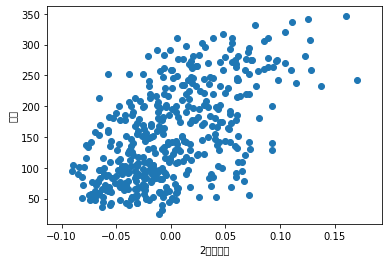

In [6]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target) #2번째 특성만 사용해서 그래프 표현
plt.xlabel('2번째특성')
plt.ylabel('환자')
plt.show()

In [0]:
x=diabetes.data[:,2]
y=diabetes.target

## **경사하강법**

In [0]:
#w,b 초기화
w=1.0
b=1.0

In [15]:
y_hat=x[0]*w+b
print(x[0]) #첫번째환자의 2번째 특성
print(y_hat)  # 151과 너무 다름

0.0616962065186885
1.0616962065186886


In [16]:
print(y[0])

151.0


In [17]:
#w값조절해 예측값 바꾸기
w_inc=w+0.1
y_hat_inc=x[0]*w_inc+b
print(y_hat_inc) #151과 너무 다름

1.0678658271705574


In [19]:
#w값 저정한 후, 예측값증가정도 확인하기
w_rate=(y_hat_inc-y_hat)/(w_inc-w)
print(w_rate)  #x[0]와 값이 같음

0.061696206518688734
